Design and conduct an experiment to demonstrate the difficulties that sample-average methods have for nonstationary problems. Use a modified version of the 10-armed testbed in which all the q⇤(a) start out equal and then take independent random walks (say by adding a normally distributed increment with mean zero and standard deviation 0.01 to all the q⇤(a) on each step). Prepare plots like Figure 2.2 for an action-value method using sample averages, incrementally computed, and another action-value method using a constant step-size parameter, ↵ = 0.1. Use " = 0.1 and longer runs, say of 10,000 steps.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def get_reward(action):
    bandit_means = np.array([1,-2,3,1,5,2,4,-3,6,0])
    return round(np.random.normal(bandit_means[action],1),2)


print(get_reward(4))

4.61


In [2]:
get_reward(1)

-2.61

In [3]:
def simple_bandit(limit,bandits,eps):
    Q = np.zeros(bandits)
    N = np.zeros(bandits)
    steps = range(0,limit)
    rewards = np.empty(0)
    for i in steps:
        # print('Q',end='')
        # print(Q)
        # print('N',end='')
        # print(N)
        # print('Rewards',end='')
        # print(rewards)
        rand = np.random.random()
        if rand > eps:
            A = np.argmax(Q)
        else:
            # print('random action')
            A = np.random.randint(0,bandits)
        R = get_reward(A)
        rewards = np.append(rewards,R)
        N[A] += 1
        Q[A] += 1/N[A]*(R - Q[A])

    return rewards
    # plot
    # plt.plot(steps,rewards)
    # plt.show()



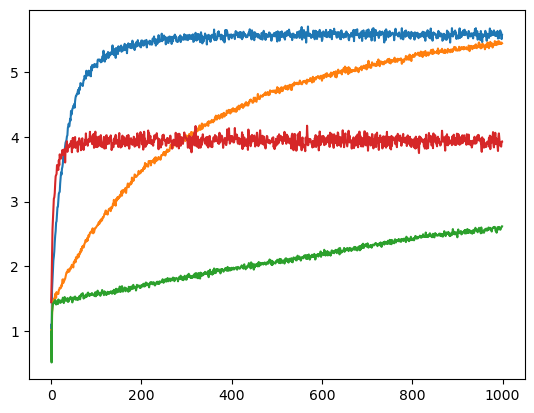

In [4]:
def average_reward(runs,step_limit,eps):
    sum_rewards = np.zeros(step_limit)
    for i in range(0,runs):
        current_rewards = simple_bandit(step_limit,9,eps) 
        sum_rewards = sum_rewards + current_rewards
    avg_r = sum_rewards/runs
    plt.plot(range(0,len(avg_r)),avg_r,label = eps)
average_reward(2000,1000,0.1)
average_reward(2000,1000,0.01)
average_reward(2000,1000,0.001)
average_reward(2000,1000,0.5)

In [5]:
simple_bandit(1000,9)

TypeError: simple_bandit() missing 1 required positional argument: 'eps'

In [ ]:
print(np.empty(0))

[]
